<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/RF_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

from ggplot import *

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/lib/python3.6/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [ ]:
df_all = pd.read_csv("Tooltest-dataset.csv")

In [ ]:
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [ ]:
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [ ]:
df_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


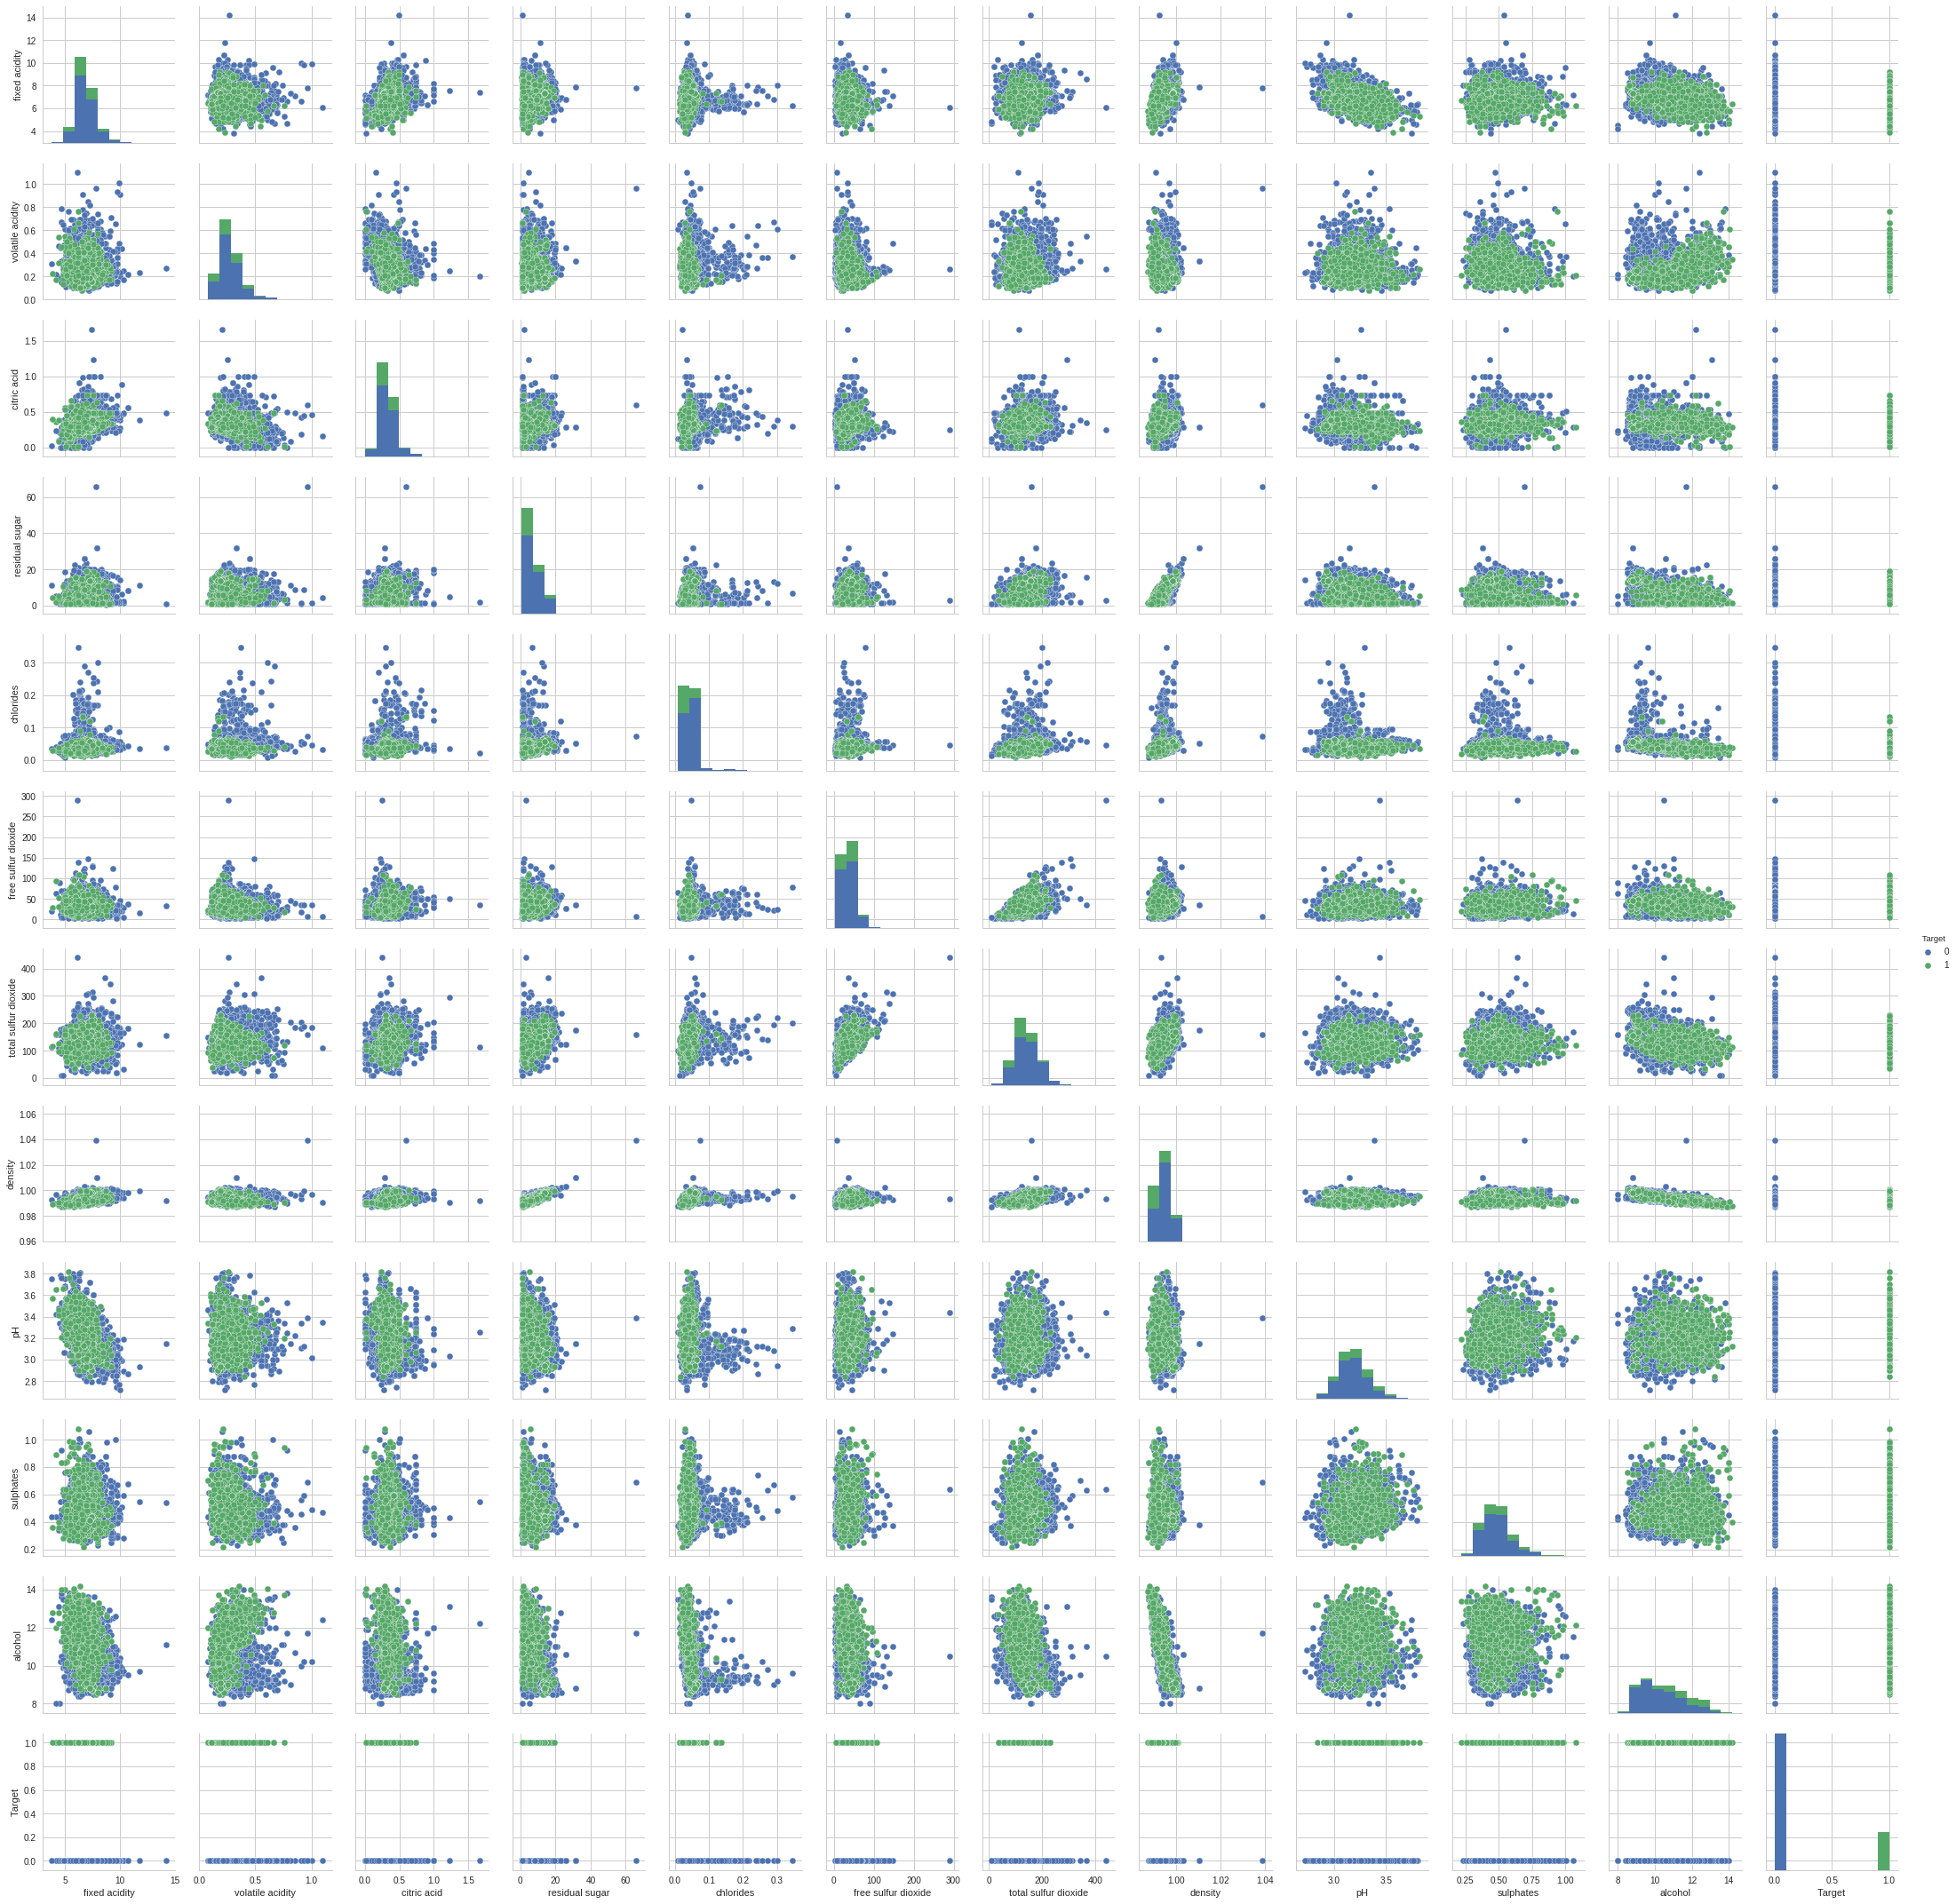

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.pairplot(df_all, diag_kind='hist',hue='Target')

In [ ]:
df_all.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Target                  0
dtype: int64

In [ ]:
df_all.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.216415
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.411842
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [ ]:
df_all['Target'].value_counts()

0    3838
1    1060
Name: Target, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


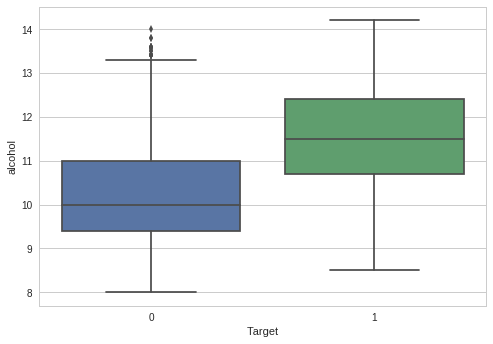

In [ ]:
sns.boxplot('Target', 'alcohol', data = df_all)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


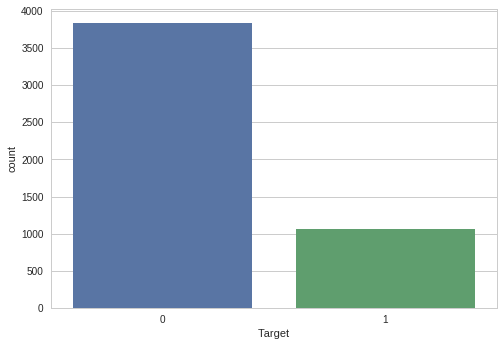

In [ ]:
sns.countplot(x='Target', data=df_all)

In [ ]:
correlations = df_all.corr()['Target'].drop('Target')
print(correlations)

fixed_acidity          -0.080748
volatile_acidity       -0.067225
citric_acid            -0.035330
residual_sugar         -0.117085
chlorides              -0.183118
free_sulfur_dioxide    -0.023413
total_sulfur_dioxide   -0.162202
density                -0.283871
pH                      0.093510
sulphates               0.047410
alcohol                 0.385132
Name: Target, dtype: float64


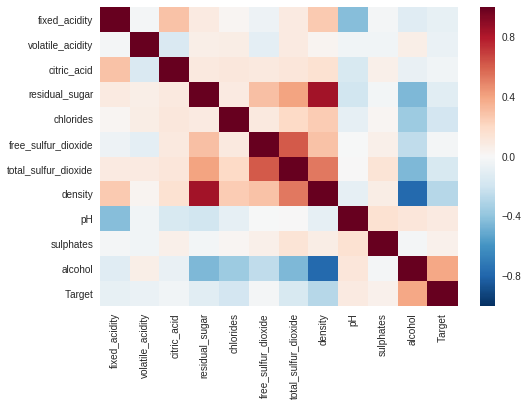

In [ ]:
sns.heatmap(df_all.corr())
plt.show()

In [ ]:
data = df_all[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target = df_all['Target']

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(data,target,test_size = 0.33,random_state=123)

In [ ]:
[subset.shape for subset in [data_train,data_test,target_train,target_test]]

[(3281, 11), (1617, 11), (3281,), (1617,)]

In [ ]:
simpleTree = DecisionTreeClassifier(max_depth=5)

In [ ]:
simpleTree.fit(data_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
gbmTree = GradientBoostingClassifier(max_depth=5)

In [ ]:
gbmTree.fit(data_train,target_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
rfTree = RandomForestClassifier(max_depth=5)

In [ ]:
rfTree.fit(data_train,target_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
simpleTreePerformance = precision_recall_fscore_support(target_test,simpleTree.predict(data_test))

In [ ]:
gbmTreePerformance = precision_recall_fscore_support(target_test,gbmTree.predict(data_test))

In [ ]:
rfTreePerformance = precision_recall_fscore_support(target_test,rfTree.predict(data_test))

In [ ]:
simpleTreePerformance

(array([0.86759327, 0.564     ]),
 array([0.91583012, 0.4378882 ]),
 array([0.89105935, 0.49300699]),
 array([1295,  322]))

In [ ]:
gbmTreePerformance

(array([0.8998538 , 0.74297189]),
 array([0.95057915, 0.57453416]),
 array([0.92452122, 0.64798599]),
 array([1295,  322]))

In [ ]:
rfTreePerformance

(array([0.84366577, 0.67669173]),
 array([0.96679537, 0.27950311]),
 array([0.90104354, 0.3956044 ]),
 array([1295,  322]))

In [ ]:
print('Precision, Recall, Fscore, and Support for each class in simple, gradient boosted, and random forest tree classifiers:'+'\n')
for treeMethod in [simpleTreePerformance,gbmTreePerformance,rfTreePerformance]:
    print('Precision: ',treeMethod[0])
    print('Recall: ',treeMethod[1])
    print('Fscore: ',treeMethod[2])
    print('Support: ',treeMethod[3],'\n')

Precision, Recall, Fscore, and Support for each class in simple, gradient boosted, and random forest tree classifiers:

Precision:  [0.86759327 0.564     ]
Recall:  [0.91583012 0.4378882 ]
Fscore:  [0.89105935 0.49300699]
Support:  [1295  322] 

Precision:  [0.8998538  0.74297189]
Recall:  [0.95057915 0.57453416]
Fscore:  [0.92452122 0.64798599]
Support:  [1295  322] 

Precision:  [0.84366577 0.67669173]
Recall:  [0.96679537 0.27950311]
Fscore:  [0.90104354 0.3956044 ]
Support:  [1295  322] 



In [ ]:
print('Confusion Matrix for simple, gradient boosted, and random forest tree classifiers:')
print('Simple Tree:\n',confusion_matrix(target_test,simpleTree.predict(data_test)),'\n')
print('Gradient Boosted:\n',confusion_matrix(target_test,gbmTree.predict(data_test)),'\n')
print('Random Forest:\n',confusion_matrix(target_test,rfTree.predict(data_test)))

Confusion Matrix for simple, gradient boosted, and random forest tree classifiers:
Simple Tree:
 [[1186  109]
 [ 181  141]] 

Gradient Boosted:
 [[1231   64]
 [ 137  185]] 

Random Forest:
 [[1252   43]
 [ 232   90]]


In [ ]:
gbmTree.feature_importances_

array([0.04795143, 0.10058557, 0.04956653, 0.07981816, 0.06602229,
       0.07846871, 0.05745284, 0.08445218, 0.06361536, 0.07058052,
       0.3014864 ])

In [ ]:
print('Feature Importances for GBM tree\n')
for importance,feature in zip(gbmTree.feature_importances_,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']):
    print('{}: {}'.format(feature,importance))

Feature Importances for GBM tree

fixed acidity: 0.04795142613196208
volatile acidity: 0.10058557264555912
citric acid: 0.049566529690188495
residual sugar: 0.07981816401977339
chlorides: 0.06602229368753056
free sulfur dioxide: 0.07846871454931187
total sulfur dioxide: 0.05745283974768839
density: 0.08445218171357068
pH: 0.06361536177510195
sulphates: 0.07058051937845533
alcohol: 0.3014863966608581
